#Q3

#Implement Linear Regression for the Abalone Dataset.

In [62]:
#importing libraries
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt

In [63]:
#importing Abalone Dataset
Data=pd.read_csv('/content/abalone.data')

In [64]:
Data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,\t\t
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,NaN
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,NaN
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,NaN
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,NaN
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,NaN
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,NaN
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,NaN
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,NaN
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,NaN


In [65]:
#checking the columns
Data.columns


Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', '\t\t'],
      dtype='object')

In [66]:
#removing unwanted column
Data=Data.drop(['\t\t'], axis = 1)
Data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [67]:
#one hot encoding to get dummy variables for categorical data
Data = pd.get_dummies(Data, columns = [ 'Sex'])
Data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


#Visualizing attributes

In [7]:
Data.shape


(4177, 11)

In [8]:
Data.head

<bound method NDFrame.head of       Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      She

In [9]:
Data.tail

<bound method NDFrame.tail of       Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      She

In [10]:
Data.describe().T


,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000
Sex_F,4177.0,0.312904,0.463731,0.0000,0.0000,0.0000,1.000,1.0000
Sex_I,4177.0,0.321283,0.467025,0.0000,0.0000,0.0000,1.000,1.0000


#Visualizing some attributes through histogram

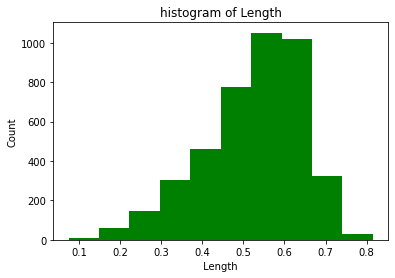

In [11]:
plt.hist(Data['Length'], color='green')
plt.xlabel(" Length ")
plt.ylabel("Count")
plt.title("histogram of Length" )
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


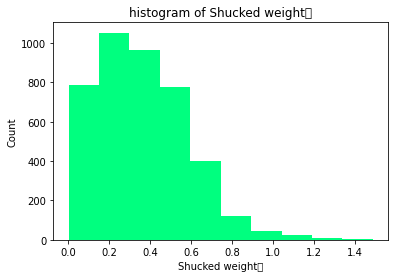

In [12]:
plt.hist(Data['Shucked weight'], color='springgreen')
plt.xlabel("Shucked weight	")
plt.ylabel("Count")
plt.title("histogram of Shucked weight	" )
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


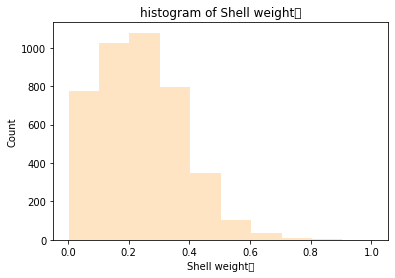

In [13]:
plt.hist(Data['Shell weight'], color='bisque')
plt.xlabel("Shell weight	")
plt.ylabel("Count")
plt.title("histogram of Shell weight	" )
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


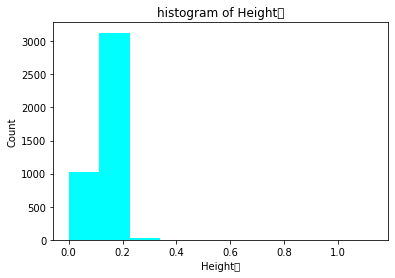

In [14]:
plt.hist(Data['Height'], color='aqua')
plt.xlabel("Height	")
plt.ylabel("Count")
plt.title("histogram of Height	" )
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


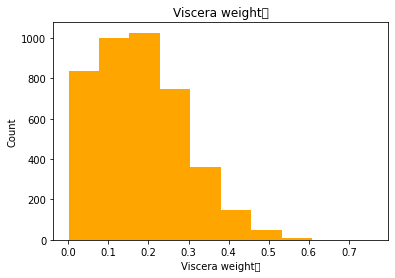

In [15]:
plt.hist(Data['Viscera weight'], color='orange')
plt.xlabel("Viscera weight	")
plt.ylabel("Count")
plt.title("Viscera weight	" )
plt.show()

In [16]:
#checking if there is any missing values
Data.isnull().any()

Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
Sex_F             False
Sex_I             False
Sex_M             False
dtype: bool

In [68]:
#getting features(x) and label(y)
y=Data['Rings']
y


0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [69]:
x=Data.drop(labels='Rings', axis=1)
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


splitting the data into 90% train and 10% test

In [70]:
#spliting the dataset in train and test
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
trainx, testx, trainy, testy = train_test_split(
x ,y, test_size=0.1, random_state=0)

Scaling the data

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
sc = StandardScaler()
trainx = sc.fit_transform(trainx)
testx = sc.transform(testx)

#Building linear regression model from scratch

Making a linear regression model

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [23]:
from sklearn.metrics import mean_squared_error
class linearReg:
  def __init__(self,x,y,valx,valy,theta,b,alpha,itr,scale=False):
    self.x=x
    self.y=y
    self.valx=valx
    self.valy=valy
    self.alpha=alpha
    self.theta=theta
    self.b=b
    self.itr=itr
    self.m=self.x.shape[1]
    if scale:
      self.x=self._scale()
  def Cost_F(self):
    Cost=np.sum((((self.x.dot(self.theta)+self.b)-self.y)** 2) / (2*len(self.y)))
    return Cost
  def gradientdescent(self):
     Costlist = [0] * self.itr
     Rmselist = []

     Costlist_val = [0] * self.itr
     Rmselist_val = []

     for itr in range(self.itr):
            z = self.x.dot(self.theta) + self.b
            loss = z - self.y
            
            MSE = mean_squared_error(z, self.y)
            
            RMSE = np.sqrt(MSE)
            
            Rmselist.append(RMSE)

            weight = self.x.T.dot(loss) / len(self.y)
            bias = np.sum(loss) / len(self.y)
            
            self.theta = self.theta - self.alpha*weight
            self.b = self.b - self.alpha*bias
      
            cost = self.Cost_F()
            Costlist[itr] = cost
            
            Cost_val, Rmse_val = self.Evaluate()
            
            Costlist_val[itr] = cost
            Rmselist_val.append(Rmse_val)

            if (itr%(self.itr/10)==0):
                print("Cost :",cost)
            
     return self.theta, self.b, Costlist, Rmselist, Costlist_val, Rmselist_val
    
  def cost(self, test, test_y):
    return np.sum((((test.dot(self.theta) + self.b) - test_y) ** 2) / (2*len(test_y)))
    
  def Predict(self, test):
    return test.dot(self.theta) + self.b
     
  def Evaluate(self):
    z = self.valx.dot(self.theta) + self.b
    MSE = mean_squared_error(z, self.valy)
    RMSE = np.sqrt(MSE)
    cost = self.Cost_F()
    return cost, RMSE     
        
       

kfold implimentation

Cost : 53.488297358299675
Cost : 9.659012915189434
Cost : 3.873367509066907
Cost : 2.992766865656675
Cost : 2.7945691356036937
Cost : 2.7061802693777084
Cost : 2.646261173982695
Cost : 2.600613401414898
Cost : 2.5649051555525104
Cost : 2.536734004244157
Cost : 53.025774124215566
Cost : 9.69551220072639
Cost : 3.9289954388506008
Cost : 3.0563200324272692
Cost : 2.863990697947698
Cost : 2.7804527174025426
Cost : 2.7245516661715703
Cost : 2.6822022040932927
Cost : 2.649180554780743
Cost : 2.623184983670591
Cost : 53.66048124210691
Cost : 9.777440610192011
Cost : 3.962659082285234
Cost : 3.0826722414687904
Cost : 2.8886232631633213
Cost : 2.804311897170617
Cost : 2.7478514149793742
Cost : 2.704999106059673
Cost : 2.671493813404047
Cost : 2.645032173162848
Cost : 53.189975721032205
Cost : 9.653094916668108
Cost : 3.883204638405913
Cost : 3.008123929496766
Cost : 2.813338056812176
Cost : 2.727717102261029
Cost : 2.6701056651721684
Cost : 2.6263319727706556
Cost : 2.59210424337103
Cost : 2.56

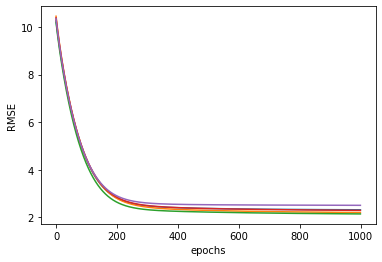

In [24]:
kf = KFold(n_splits=5)
trainy.reset_index(inplace=True, drop=True)
for train_index, val_index in kf.split(trainx):

   
    
    Trainx, Valx = trainx[train_index], trainx[val_index]
    Trainy, Valy = trainy[train_index], trainy[val_index]
    
    
    theta = np.zeros(Trainx.shape[1])
    b = 0
    itr = 1000
    alpha = 0.01
    
    lr = linearReg(Trainx, Trainy, Valx, Valy, theta, b, alpha, itr)
    theta, b, cost_history, Rmselist, cost_history_val, Rmselist_val = lr.gradientdescent()
    
    plt.plot(range(itr), Rmselist_val)
    plt.xlabel('epochs')
    plt.ylabel('RMSE')


In [25]:
y_pred = lr.Predict(testx)


In [26]:
y_pred

array([12.41792334,  8.93170621, 10.40184932,  5.33494081, 10.80509173,
       11.99611944,  8.48121367,  9.8534174 ,  8.29264133, 11.54934968,
        8.32856546,  6.32597127,  8.74349778,  9.44904405,  5.69318514,
       10.02763353,  8.21122356, 13.07058806, 11.53859656,  7.77160511,
        7.50228853,  6.69194283,  8.58501651,  8.21322558,  9.40680915,
       11.36573278,  5.0540752 , 12.52855965,  9.94335776, 11.02111076,
        8.4205227 ,  4.03894749, 11.77134028, 13.32281277,  7.46957604,
        9.41059517,  8.84770481, 10.73995808,  8.35955825, 11.84284675,
       11.75608443,  9.90200114, 11.52839037, 11.35063965, 12.1152024 ,
        9.80535554,  9.97044668, 12.86995067, 11.49255514,  7.83605954,
       11.62736928,  7.11849922,  9.33884498, 13.02632312,  9.90250153,
        8.27717316,  6.72116787,  7.8435502 ,  7.14914974,  7.00321765,
       10.05158883, 10.00520228, 10.32767332,  8.01076017,  7.82070792,
       12.32891677, 12.70323055, 12.76095289,  8.91672037, 13.53

In [106]:
 from sklearn.metrics import mean_squared_error 

#linear regression with L1 regularization

In [76]:
from sklearn.metrics import mean_squared_error
class linearL1g:
    def __init__(self,x,y,valx,valy,theta,b,alpha,itr,lambda1):
        self.x=x
        self.y=y
        self.valx=valx
        self.lambda1=lambda1
        self.valy=valy
        self.alpha=alpha
        self.theta=theta
        self.b=b
        self.itr=itr
        self.m=self.x.shape[1]
   
    def Cost_F(self):
      cost = np.sum((((self.x.dot(self.theta) + self.b) - self.y) ** 2)+self.lambda1*np.sum(np.abs(self.theta))) / (2*self.m)
      return cost

        

    def gradientdescent(self):
        Costlist = [0] * self.itr
        Rmselist = []
        Costlist_val = [0] * self.itr
        Rmselist_val = []
        for itr in range(self.itr):
            z = self.x.dot(self.theta) + self.b
            loss = z - self.y
            MSE = mean_squared_error(z, self.y)
            RMSE = np.sqrt(MSE)
            Rmselist.append(RMSE)
            weight =(self.x.T.dot(loss) + self.lambda1*np.sign(self.theta)) / self.m
            bias = np.sum(loss) / self.m
            self.theta = self.theta - self.alpha*weight
            self.b = self.b - self.alpha*bias
      
            cost = self.Cost_F()
            Costlist[itr] = cost
            
            Cost_val, Rmse_val = self.Evaluate()
            
            Costlist_val[itr] = cost
            Rmselist_val.append(Rmse_val)

            if (itr%(self.itr/10)==0):
                print("Cost :",cost)
            
        return self.theta, self.b, Costlist, Rmselist, Costlist_val, Rmselist_val
    
    def cost(self, test, test_y):
        return np.sum((((test.dot(self.theta) + self.b) - test_y) ** 2) / (2*len(test_y)))
    
    def Predict(self, test):
        return test.dot(self.theta) + self.b
     
    def Evaluate(self):
        z = self.valx.dot(self.theta) + self.b
        MSE = mean_squared_error(z, self.valy)
        RMSE = np.sqrt(MSE)
        cost = self.Cost_F()
        return cost, RMSE     
        
       

Cost : 637154.7303184174
Cost : 1.7908614683490757e+18
Cost : 1.4333272822668658e+31
Cost : 1.1471731460926397e+44
Cost : 9.18147755504253e+56
Cost : 7.348457412979086e+69
Cost : 5.8813873939832384e+82
Cost : 4.7072080212385363e+95
Cost : 3.7674456503035665e+108
Cost : 3.015300505937009e+121
Cost : 561013.4254795862
Cost : 1.7882579781056922e+18
Cost : 1.7603874650359244e+31
Cost : 1.7329522310777346e+44
Cost : 1.7059445689341473e+57
Cost : 1.6793578149964434e+70
Cost : 1.6531854095069963e+83
Cost : 1.627420894940492e+96
Cost : 1.602057914410658e+109
Cost : 1.5770902101018373e+122
Cost : 603095.6281129356
Cost : 2.0050023458302984e+18
Cost : 1.9593005772285818e+31
Cost : 1.914641476391967e+44
Cost : 1.8710003078273504e+57
Cost : 1.828353869407871e+70
Cost : 1.786679487862056e+83
Cost : 1.7459550067191611e+96
Cost : 1.706158774529496e+109
Cost : 1.6672696333532843e+122
Cost : 605662.1269566144
Cost : 2.204408331045356e+18
Cost : 2.3532032427106813e+31
Cost : 2.5120428129737953e+44
Cost 

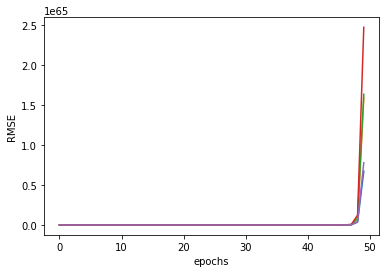

In [86]:
kf = KFold(n_splits=5)
trainy.reset_index(inplace=True, drop=True)
for train_index, val_index in kf.split(trainx):

   
    
    Trainx, Valx = trainx[train_index], trainx[val_index]
    Trainy, Valy = trainy[train_index], trainy[val_index]
    
    
    theta = np.zeros(Trainx.shape[1])
    b = 0
    itr = 50
    alpha = 0.01
    lambda1=50
    
    lr1 = linearL1g(Trainx, Trainy, Valx, Valy, theta, b, alpha, itr,lambda1)
    theta, b, cost_history, Rmselist, cost_history_val, Rmselist_val = lr1.gradientdescent()
    
    plt.plot(range(itr), Rmselist_val)
    plt.xlabel('epochs')
    plt.ylabel('RMSE')


#linear regression with L2 regularization

In [88]:
from sklearn.metrics import mean_squared_error
class linearL2g:
    def __init__(self,x,y,valx,valy,theta,b,alpha,itr,lambda2):
        self.x=x
        self.y=y
        self.valx=valx
        self.lambda2=lambda2
        self.valy=valy
        self.alpha=alpha
        self.theta=theta
        self.b=b
        self.itr=itr
        self.m=self.x.shape[1]
   
    def Cost_F(self):
      cost = np.sum((((self.x.dot(self.theta) + self.b) - self.y) ** 2)+self.lambda2*np.sum(np.square(self.theta))) / (2*self.m)
      return cost

        

    def gradientdescent(self):
        Costlist = [0] * self.itr
        Rmselist = []
        Costlist_val = [0] * self.itr
        Rmselist_val = []
        for itr in range(self.itr):
            z = self.x.dot(self.theta) + self.b
            loss = z - self.y
            MSE = mean_squared_error(z, self.y)
            RMSE = np.sqrt(MSE)
            Rmselist.append(RMSE)
            weight =(self.x.T.dot(loss) + self.lambda2*self.theta) / self.m
            bias = np.sum(loss) / self.m
            self.theta = self.theta - self.alpha*weight
            self.b = self.b - self.alpha*bias
      
            cost = self.Cost_F()
            Costlist[itr] = cost
            
            Cost_val, Rmse_val = self.Evaluate()
            
            Costlist_val[itr] = cost
            Rmselist_val.append(Rmse_val)

            if (itr%(self.itr/10)==0):
                print("Cost :",cost)
            
        return self.theta, self.b, Costlist, Rmselist, Costlist_val, Rmselist_val
    
    def cost(self, test, test_y):
        return np.sum((((test.dot(self.theta) + self.b) - test_y) ** 2) / (2*len(test_y)))
    
    def Predict(self, test):
        return test.dot(self.theta) + self.b
     
    def Evaluate(self):
        z = self.valx.dot(self.theta) + self.b
        MSE = mean_squared_error(z, self.valy)
        RMSE = np.sqrt(MSE)
        cost = self.Cost_F()
        return cost, RMSE     
        
       

Cost : 2084275.2371892692
Cost : 1.5289172406859043e+19
Cost : 1.255397751120644e+32
Cost : 1.0308100394120373e+45
Cost : 8.464005422995983e+57
Cost : 6.949814714781752e+70
Cost : 5.706509171009048e+83
Cost : 4.685628071428814e+96
Cost : 3.847380204924738e+109
Cost : 3.159092914673647e+122
Cost : 1726446.7341128972
Cost : 1.4997023343418716e+19
Cost : 1.5138043847848096e+32
Cost : 1.52803916872997e+45
Cost : 1.5424078068763302e+58
Cost : 1.5569115578957153e+71
Cost : 1.5715516922974305e+84
Cost : 1.5863294925377792e+97
Cost : 1.6012462531324144e+110
Cost : 1.6163032807697338e+123
Cost : 1916549.0749138475
Cost : 1.6826009682328154e+19
Cost : 1.686017708917263e+32
Cost : 1.6894413386405136e+45
Cost : 1.6928719203906514e+58
Cost : 1.6963094682844974e+71
Cost : 1.699753996467508e+84
Cost : 1.7032055191138643e+97
Cost : 1.7066640504265352e+110
Cost : 1.7101296046373297e+123
Cost : 1916229.7248715367
Cost : 1.8359440170064e+19
Cost : 2.009212577558794e+32
Cost : 2.198833448980995e+45
Cost :

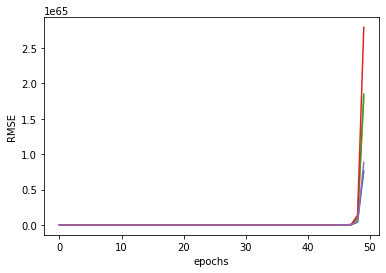

In [89]:
kf = KFold(n_splits=5)
trainy.reset_index(inplace=True, drop=True)
for train_index, val_index in kf.split(trainx):

   
    
    Trainx, Valx = trainx[train_index], trainx[val_index]
    Trainy, Valy = trainy[train_index], trainy[val_index]
    
    
    theta = np.zeros(Trainx.shape[1])
    b = 0
    itr = 50
    alpha = 0.01
    lambda2=50
    
    lr2 = linearL2g(Trainx, Trainy, Valx, Valy, theta, b, alpha, itr,lambda2)
    theta, b, cost_history, Rmselist, cost_history_val, Rmselist_val = lr2.gradientdescent()
    
    plt.plot(range(itr), Rmselist_val)
    plt.xlabel('epochs')
    plt.ylabel('RMSE')


Linear regression using scikit-learn

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
regression = LinearRegression()

In [29]:
regression.fit(trainx, trainy)

LinearRegression()

In [30]:
#comparing the analysis on test set
print(regression.score(testx, testy))

0.5473971328968752


In [34]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(regression, trainx,trainy, scoring='neg_root_mean_squared_error', cv=folds)
scores   

array([-2.25531806, -2.19787979, -2.33248578, -2.25524384, -1.99295855])

Linear regression closed form

In [101]:
from sklearn.metrics import mean_squared_error
class linearL3g:
    def __init__(self,x,y,valx,valy,theta,b,alpha,itr):
        self.x=x
        self.y=y
        self.valx=valx
        self.lambda2=lambda2
        self.valy=valy
        self.alpha=alpha
        self.theta=theta
        self.b=b
        self.itr=itr
        self.m=self.x.shape[1]

    def closedForm(self):
        self.theta = np.dot(np.linalg.inv(np.dot(self.x.T, self.X)), np.dot(self.x.T, self.y))
        return self.theta
    
   
    def Cost_F(self):
        Cost=np.sum((((self.x.dot(self.theta)+self.b)-self.y)** 2) / (2*len(self.y)))
        return Cost
        

    def gradientdescent(self):
        Costlist = [0] * self.itr
        Rmselist = []
        Costlist_val = [0] * self.itr
        Rmselist_val = []
        for itr in range(self.itr):
            z = self.x.dot(self.theta) + self.b
            loss = z - self.y
            MSE = mean_squared_error(z, self.y)
            RMSE = np.sqrt(MSE)
            Rmselist.append(RMSE)
            weight = self.x.T.dot(loss) / len(self.y)
            bias = np.sum(loss) / len(self.y)
            
            self.theta = self.theta - self.alpha*weight
            self.b = self.b - self.alpha*bias
      
            cost = self.Cost_F()
            Costlist[itr] = cost
            
            Cost_val, Rmse_val = self.Evaluate()
            
            Costlist_val[itr] = cost
            Rmselist_val.append(Rmse_val)

            if (itr%(self.itr/10)==0):
                print("Cost :",cost)
            
        return self.theta, self.b, Costlist, Rmselist, Costlist_val, Rmselist_val
    
    def cost(self, test, test_y):
        return np.sum((((test.dot(self.theta) + self.b) - test_y) ** 2) / (2*len(test_y)))
    
    def Predict(self, test):
        return test.dot(self.theta) + self.b
     
    def Evaluate(self):
        z = self.valx.dot(self.theta) + self.b
        MSE = mean_squared_error(z, self.valy)
        RMSE = np.sqrt(MSE)
        cost = self.Cost_F()
        return cost, RMSE     
        
       

Cost : 53.488297358299675
Cost : 47.98920211678585
Cost : 43.36795604627792
Cost : 39.36176934780181
Cost : 35.823596642127555
Cost : 32.665158782572234
Cost : 29.828673981969693
Cost : 27.272767560563228
Cost : 24.965390337062484
Cost : 22.88020712998755
Cost : 53.025774124215566
Cost : 47.72335187106542
Cost : 43.209585934348624
Cost : 39.263787552035225
Cost : 35.76102701934034
Cost : 32.624617800831736
Cost : 29.80285332539226
Cost : 27.257550763839113
Cost : 24.95834925662326
Cost : 22.87981853746678
Cost : 53.66048124210691
Cost : 48.22620927060288
Cost : 43.63024933561607
Cost : 39.62830795291678
Cost : 36.083741221800096
Cost : 32.9139755104582
Cost : 30.064280579947333
Cost : 27.494863968163187
Cost : 25.17445965056598
Cost : 23.077088627911273
Cost : 53.189975721032205
Cost : 47.7967424698885
Cost : 43.2381214583701
Cost : 39.2690793806951
Cost : 35.753374163667274
Cost : 32.60905418664457
Cost : 29.781950459061704
Cost : 27.232715823904996
Cost : 24.93042671185031
Cost : 22.

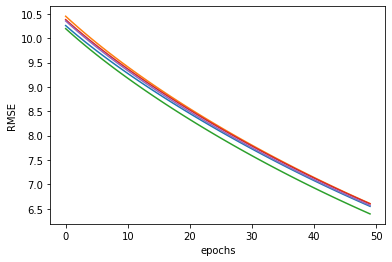

In [102]:
kf = KFold(n_splits=5)
trainy.reset_index(inplace=True, drop=True)
for train_index, val_index in kf.split(trainx):

   
    
    Trainx, Valx = trainx[train_index], trainx[val_index]
    Trainy, Valy = trainy[train_index], trainy[val_index]
    
    
    theta = np.zeros(Trainx.shape[1])
    b = 0
    itr = 50
    alpha = 0.01
   
    
    LR = linearL3g(Trainx, Trainy, Valx, Valy,theta, b, alpha, itr)
    theta, b, cost_history, Rmselist, cost_history_val, Rmselist_val = LR.gradientdescent()
    
    plt.plot(range(itr), Rmselist_val)
    plt.xlabel('epochs')
    plt.ylabel('RMSE')
